In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [98]:
df = pd.read_csv('cleaned_Algerian_Forest')

In [99]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [100]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes'],
      dtype='object')

In [101]:
df.drop(columns = ['day','month','year'],axis = 1,inplace = True)

In [102]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [103]:
df['Classes'].value_counts()

1    138
0    107
Name: Classes, dtype: int64

In [104]:
###independent and dependent feature
x = df.drop('FWI',axis = 1)
y = df['FWI']

In [105]:
x.shape

(245, 11)

In [106]:
y.shape

(245,)

In [107]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25,random_state=42) 

In [109]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((183, 11), (62, 11), (183,), (62,))

In [110]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
Temperature,1.000000,-0.370525,0.016478,-0.273787,0.743180,0.462328,0.350810,0.562315,0.436881,0.161613,0.390237
RH,-0.370525,1.000000,0.297411,0.225887,-0.457529,-0.341671,-0.156720,-0.651109,-0.286126,-0.400162,-0.411954
Ws,0.016478,0.297411,1.000000,0.216006,0.016597,0.041477,0.107915,0.070958,0.068893,-0.227848,-0.083308
Rain,-0.273787,0.225887,0.216006,1.000000,-0.481809,-0.257306,-0.268691,-0.299849,-0.267390,-0.082204,-0.324814
FFMC,0.743180,-0.457529,0.016597,-0.481809,1.000000,0.592869,0.489602,0.707367,0.576490,0.205279,0.681801
DMC,0.462328,-0.341671,0.041477,-0.257306,0.592869,1.000000,0.864171,0.659592,0.982052,0.176733,0.580300
DC,0.350810,-0.156720,0.107915,-0.268691,0.489602,0.864171,1.000000,0.472222,0.941483,-0.114438,0.498287
ISI,0.562315,-0.651109,0.070958,-0.299849,0.707367,0.659592,0.472222,1.000000,0.612125,0.274042,0.691305
BUI,0.436881,-0.286126,0.068893,-0.267390,0.576490,0.982052,0.941483,0.612125,1.000000,0.071500,0.571598
Region,0.161613,-0.400162,-0.227848,-0.082204,0.205279,0.176733,-0.114438,0.274042,0.071500,1.000000,0.168699


<Axes: >

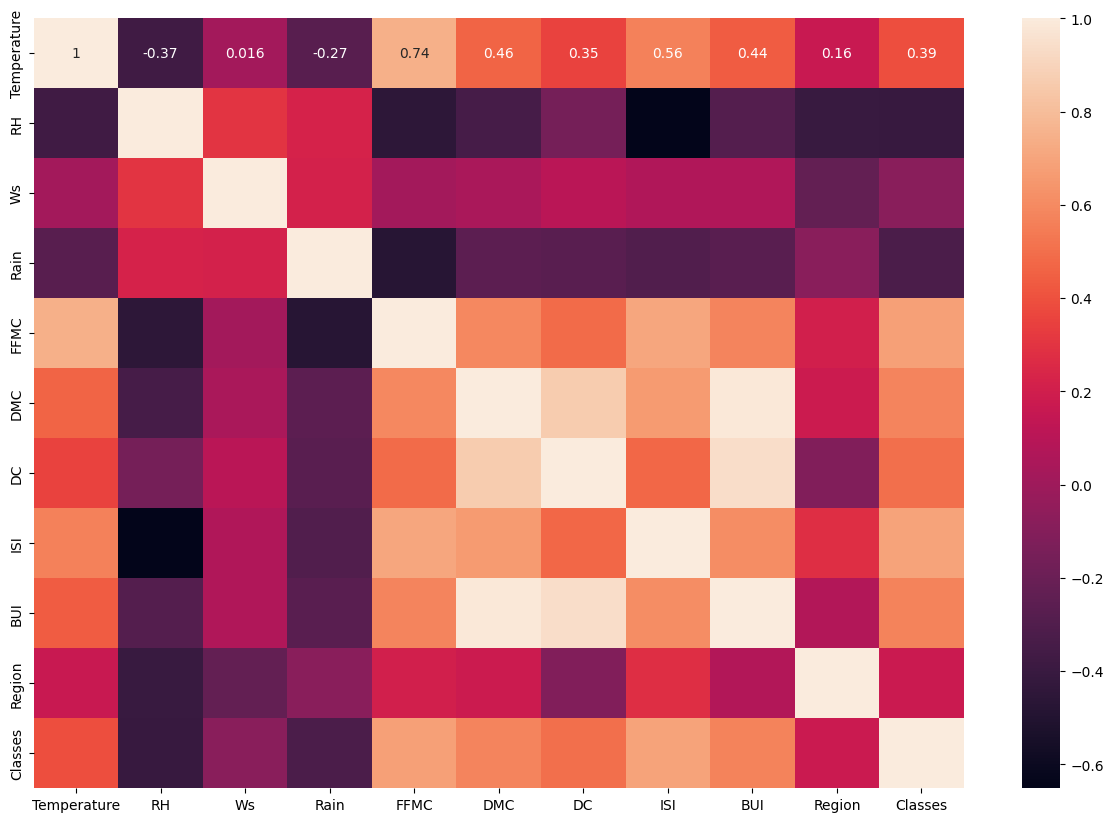

In [111]:
## Check for mulitcollinearity
plt.figure(figsize = (15,10))
corr = x_train.corr()
sns.heatmap(corr,annot = True)

In [112]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
        

In [113]:
## thrshhold__Domain_expertise
corr_features = correlation(x_train,0.85)

In [114]:
### Drop the feature when correlation is higher than 0.85
x_train.drop(corr_features,axis = 1,inplace = True)


In [115]:
x_test.drop(corr_features,axis = 1,inplace = True)

In [116]:
x_train.shape,x_test.shape

((183, 9), (62, 9))

## Feature Scaling or standardization()

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [120]:
x_train_scaled

array([[ 0.93976373, -0.39091267,  0.1711072 , ...,  0.76894682,
         0.98373875,  0.8813053 ],
       [-0.1842674 ,  0.62922307, -0.50960188, ..., -0.2376472 ,
         0.98373875,  0.8813053 ],
       [ 0.04053883, -0.13587874,  0.85181629, ..., -0.60368138,
        -1.01653005, -1.13468057],
       ...,
       [-1.53310475,  0.88425701,  0.51146174, ..., -1.06122411,
        -1.01653005, -1.13468057],
       [-0.63387985,  1.58560033,  0.85181629, ..., -0.46641856,
         0.98373875, -1.13468057],
       [-0.40907362,  0.94801549,  1.87287991, ..., -0.85532988,
        -1.01653005, -1.13468057]])

E:\UDEMY_ML\venv\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


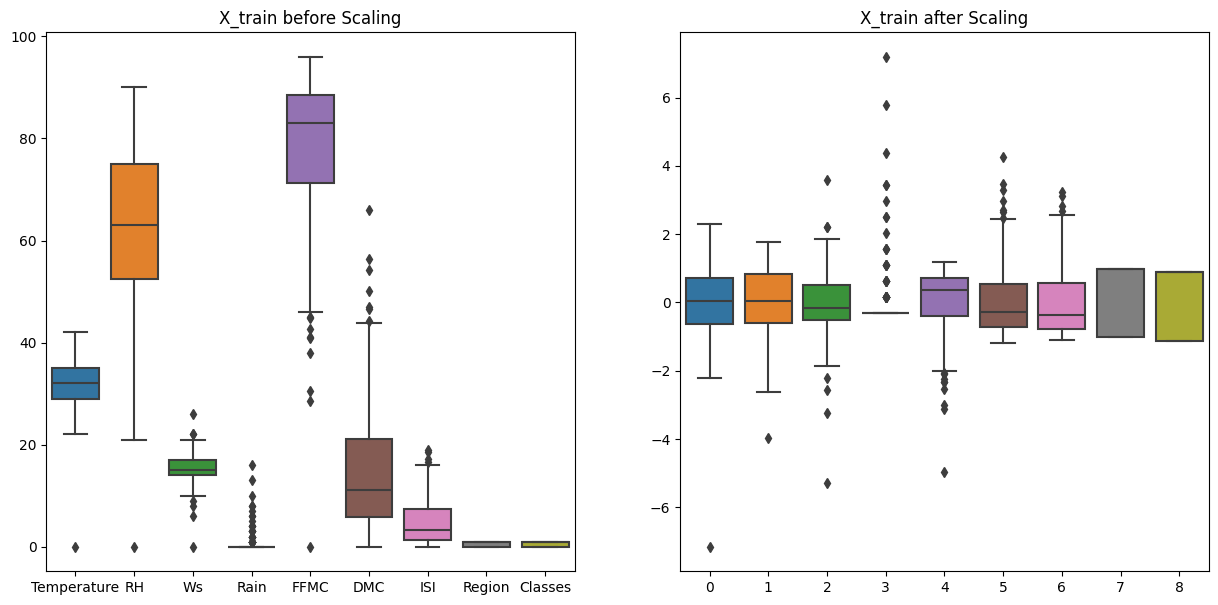

In [121]:
### BOx plot to understand the effect of standard scaler
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('X_train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('X_train after Scaling')
plt.show()

###   Linear Regression


In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [123]:
model = LinearRegression(n_jobs=- 1)

In [124]:
model.fit(x_train_scaled,y_train)

LinearRegression(n_jobs=-1)

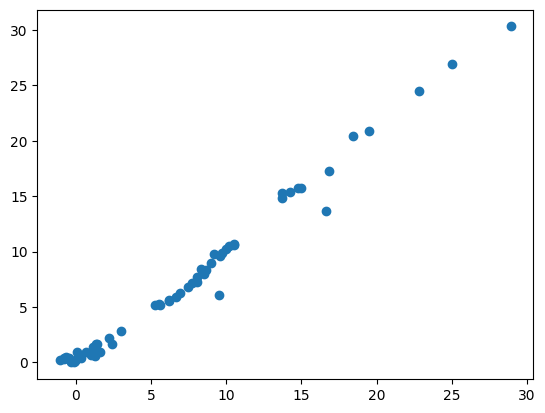

In [131]:
y_pred = model.predict(x_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_test,y_pred)
plt.scatter(y_pred,y_test)

In [132]:
mae

0.6896253795374602

In [133]:
score

0.9828487467934435

### Lassso Model

The mean absolute error:1.2236822426871388
The r2_score:0.9145976022028923 


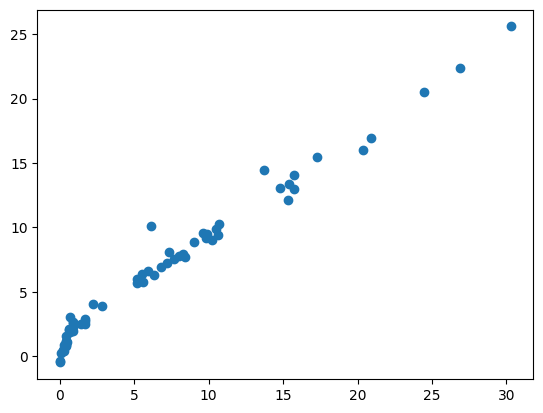

In [135]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model1 = Lasso()
model1.fit(x_train_scaled,y_train)
y_pred = model1.predict(x_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
plt.scatter(y_test,y_pred)
print(f'The mean absolute error:{mae}')
print(f'The r2_score:{score} ')

### Ridge regression

The mean absolute error:0.7055783284305254
The r2_score:0.9809232291554798 


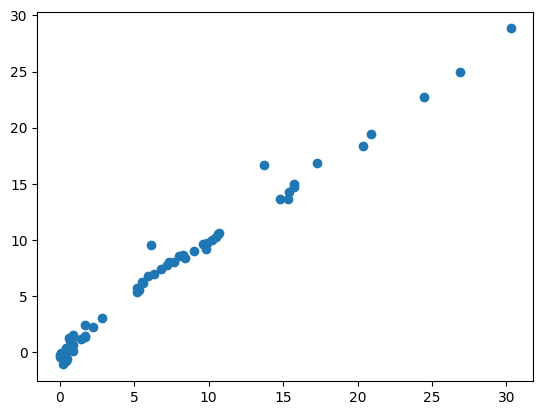

In [137]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model2 = Ridge()
model2.fit(x_train_scaled,y_train)
y_pred = model2.predict(x_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
plt.scatter(y_test,y_pred)
print(f'The mean absolute error:{mae}')
print(f'The r2_score:{score} ')

### ElasticNet regression

The mean absolute error:1.7455327315337936
The r2_score:0.7931905771049561 


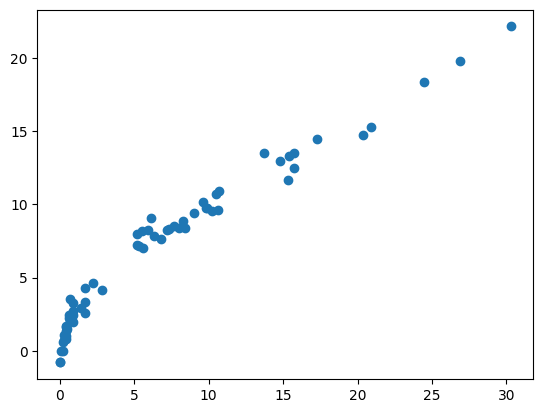

In [139]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model3 = ElasticNet()
model3.fit(x_train_scaled,y_train)
y_pred = model3.predict(x_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
plt.scatter(y_test,y_pred)
print(f'The mean absolute error:{mae}')
print(f'The r2_score:{score} ')

### Cross validation

In [140]:
from sklearn.linear_model import LassoCV
cv1 = LassoCV(cv=5)
cv1.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [141]:
cv1.predict(x_test_scaled)

array([ 8.33219187e+00,  7.75245663e+00, -5.10748310e-01,  6.65188670e+00,
        1.37426832e+01,  1.53647249e+00,  1.05381536e+01, -1.01837772e+00,
        1.83670493e+00, -4.75499356e-01,  5.22553392e-01,  9.70664004e+00,
        1.77142451e+00,  1.67299612e+01,  1.81075251e+01,  5.63235874e+00,
        4.62043566e-01, -5.98315768e-01,  7.48651949e+00, -6.35521738e-01,
        1.62785618e+00,  7.78879045e-02,  8.09271220e+00,  1.74418603e-02,
        2.25981547e+01, -2.94303506e-01,  6.18192844e+00,  9.91499864e+00,
        5.69744277e+00,  9.73849025e+00,  8.65928574e+00, -5.56192678e-01,
        1.03861713e+01,  1.45555085e+01,  1.40201035e+00,  1.51751979e+00,
        8.61650717e-01,  6.25065001e+00, -3.63549806e-01, -6.88289447e-01,
        6.83901870e+00,  4.96212771e-01,  3.13027575e+00, -8.08875414e-01,
        1.49788735e+01,  8.51146406e+00,  2.47859035e+01,  1.31593080e+00,
        1.01765141e+01,  9.29457325e+00,  2.85903185e+01,  2.44416172e+00,
        8.17399687e+00,  

In [142]:
cv1.alpha_

0.06744760869472033

In [143]:
cv1.alphas_

array([6.74476087, 6.29018656, 5.86624904, 5.47088349, 5.10216425,
       4.75829546, 4.43760227, 4.13852273, 3.85960015, 3.59947601,
       3.35688338, 3.13064067, 2.91964597, 2.7228716 , 2.53935917,
       2.36821486, 2.20860511, 2.05975251, 1.92093209, 1.79146769,
       1.67072877, 1.55812724, 1.45311468, 1.35517961, 1.26384504,
       1.17866612, 1.09922797, 1.02514368, 0.95605243, 0.89161769,
       0.83152564, 0.7754836 , 0.7232186 , 0.67447609, 0.62901866,
       0.5866249 , 0.54708835, 0.51021643, 0.47582955, 0.44376023,
       0.41385227, 0.38596001, 0.3599476 , 0.33568834, 0.31306407,
       0.2919646 , 0.27228716, 0.25393592, 0.23682149, 0.22086051,
       0.20597525, 0.19209321, 0.17914677, 0.16707288, 0.15581272,
       0.14531147, 0.13551796, 0.1263845 , 0.11786661, 0.1099228 ,
       0.10251437, 0.09560524, 0.08916177, 0.08315256, 0.07754836,
       0.07232186, 0.06744761, 0.06290187, 0.05866249, 0.05470883,
       0.05102164, 0.04758295, 0.04437602, 0.04138523, 0.03859

The mean absolute error:0.7447449472601634
The r2_score:0.9785458031682996 


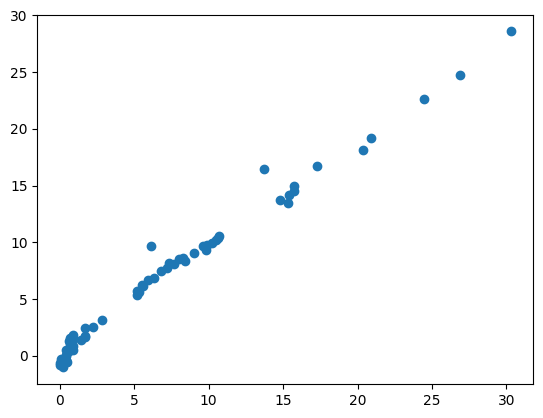

In [144]:
y_pred = cv1.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print(f'The mean absolute error:{mae}')
print(f'The r2_score:{score} ')

In [145]:
scaler

StandardScaler()

In [146]:
model2

Ridge()

In [150]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(model2,open('ridge.pkl','wb')) 